In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [41]:
img = image.load_img("C:/Users/smart tech/Desktop/projet tooth decay/basedata/training/dentcarie/1.JPG")

In [37]:
cwd = os.getcwd()
cwd

'C:\\Users\\smart tech'

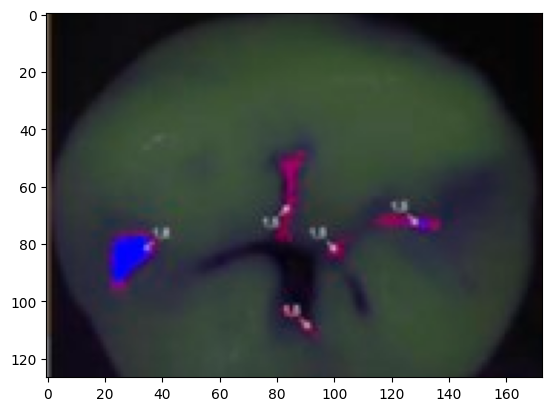

In [50]:
plt.imshow(img)

In [15]:
cv2.imread("projet tooth decay/basedata/training/dentsaine/1.JPG").shape

(403, 452, 3)

In [23]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [24]:
train_dataset = train.flow_from_directory('projet tooth decay/basedata/training/',
                                         target_size= (200,200),
                                          batch_size= 3,
                                          class_mode = 'binary')
validation_dataset = train.flow_from_directory('projet tooth decay/basedata/validation/',
                                         target_size= (200,200),
                                          batch_size= 3,
                                          class_mode = 'binary')

Found 83 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [25]:
train_dataset.class_indices

{'dentcarie': 0, 'dentsaine': 1}

In [26]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation= 'relu',input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation= 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
])


In [27]:
model.compile(loss= 'binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [28]:
model_fit = model.fit(train_dataset,
                      epochs= 40,
                     validation_data= validation_dataset)

Epoch 1/40
28/28 [==============================] - 44s 1s/step - loss: 1.2318 - accuracy: 0.5422 - val_loss: 0.6665 - val_accuracy: 0.6154
Epoch 2/40
28/28 [==============================] - 34s 1s/step - loss: 0.7117 - accuracy: 0.6867 - val_loss: 0.6414 - val_accuracy: 0.8462
Epoch 3/40
28/28 [==============================] - 34s 1s/step - loss: 0.6370 - accuracy: 0.6265 - val_loss: 2.3773 - val_accuracy: 0.6154
Epoch 4/40
28/28 [==============================] - 34s 1s/step - loss: 0.7166 - accuracy: 0.7229 - val_loss: 0.4790 - val_accuracy: 0.6923
Epoch 5/40
28/28 [==============================] - 34s 1s/step - loss: 0.4809 - accuracy: 0.7831 - val_loss: 0.5437 - val_accuracy: 0.7692
Epoch 6/40
28/28 [==============================] - 34s 1s/step - loss: 0.4506 - accuracy: 0.8193 - val_loss: 0.2600 - val_accuracy: 0.9231
Epoch 7/40
28/28 [==============================] - 34s 1s/step - loss: 0.3657 - accuracy: 0.8313 - val_loss: 0.1429 - val_accuracy: 0.9615
Epoch 8/40
28/28 [==

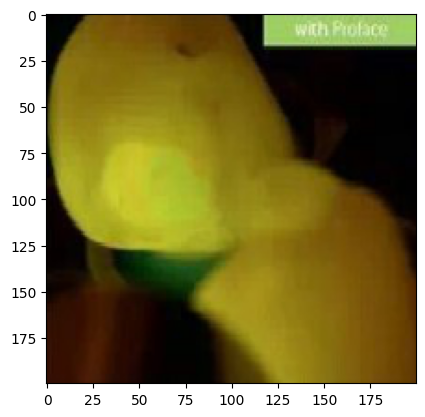

1/1 [==============================] - 1s 625ms/step
La dent est saine


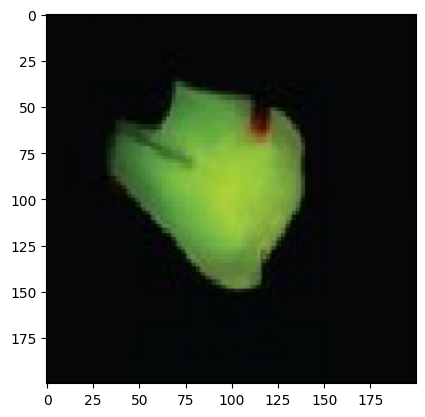

1/1 [==============================] - 0s 172ms/step
La dent présente une carie


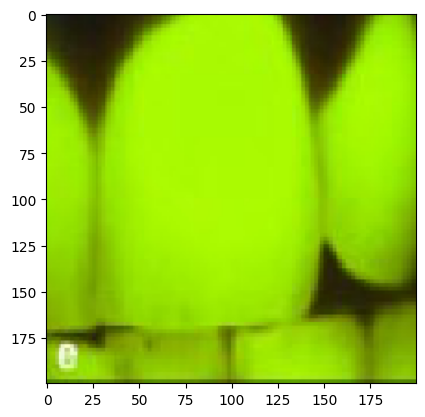

1/1 [==============================] - 0s 172ms/step
La dent est saine


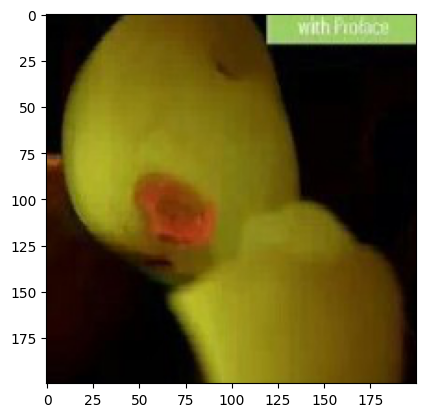

1/1 [==============================] - 0s 153ms/step
La dent présente une carie


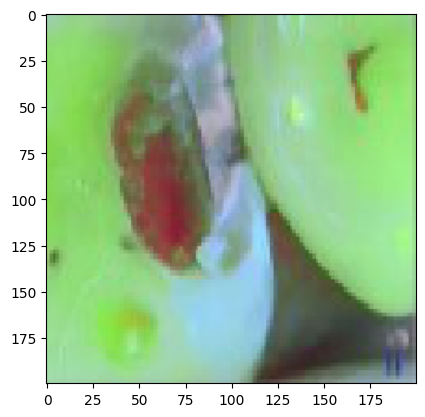

1/1 [==============================] - 0s 134ms/step
La dent présente une carie


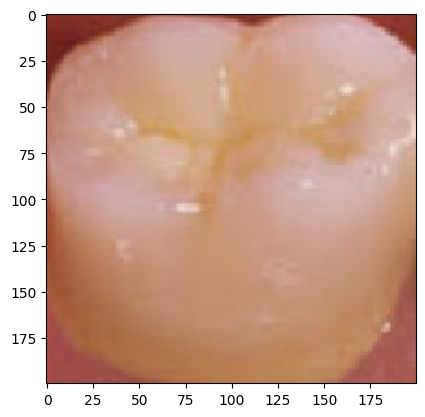

1/1 [==============================] - 0s 109ms/step
La dent est saine


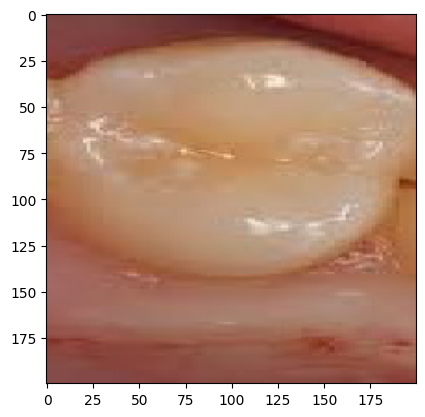

1/1 [==============================] - 0s 109ms/step
La dent est saine


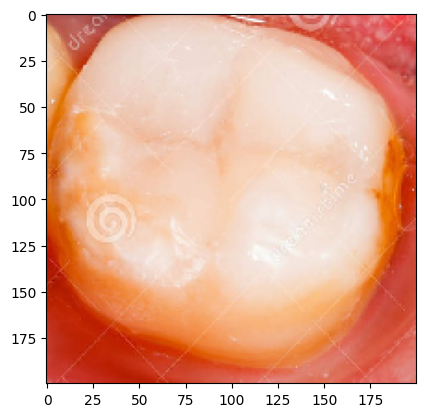

1/1 [==============================] - 0s 109ms/step
La dent est saine


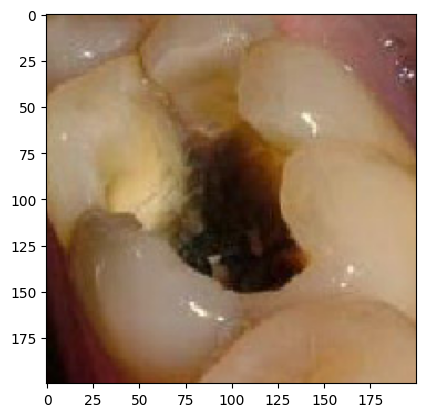

1/1 [==============================] - 0s 78ms/step
La dent présente une carie


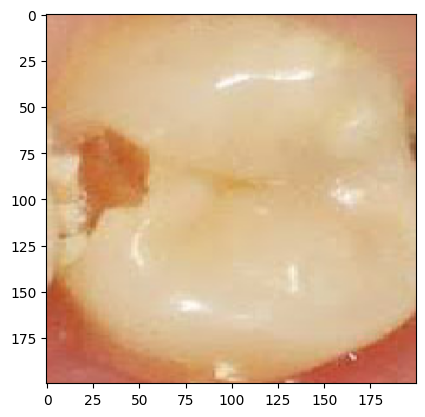

1/1 [==============================] - 0s 79ms/step
La dent présente une carie


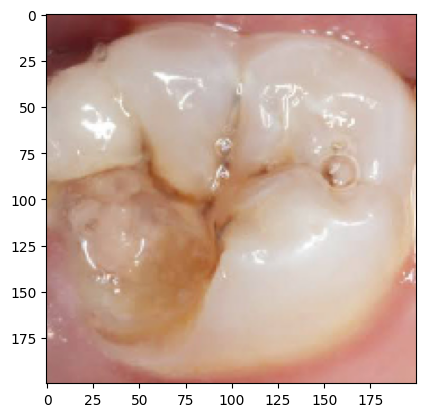

1/1 [==============================] - 0s 94ms/step
La dent présente une carie


In [42]:
dir_path = 'projet tooth decay/basedata/testing/'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show() 
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis =0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("La dent présente une carie")
    else:
        print("La dent est saine")

In [49]:
img = cv2.imread('C:/Users/smart tech/Desktop/projet tooth decay/basedata/training/dentcarie/8.JPG')

In [47]:
model.save("my_tensorflow_model2.h5")